In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
import datetime as dt
from datetime import datetime

In [3]:
sales=pd.read_csv("/Users/roaa/Downloads/supermarket_sales.csv")

In [4]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [9]:
sales.describe().round(2)

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,55.67,5.51,15.38,322.97,307.59,4.76,15.38,6.97
std,26.49,2.92,11.71,245.89,234.18,0.00,11.71,1.72
min,10.08,1.00,0.51,10.68,10.17,4.76,0.51,4.00
25%,32.88,3.00,5.92,124.42,118.50,4.76,5.92,5.50
50%,55.23,5.00,12.09,253.85,241.76,4.76,12.09,7.00
75%,77.94,8.00,22.45,471.35,448.90,4.76,22.45,8.50
max,99.96,10.00,49.65,1042.65,993.00,4.76,49.65,10.00


In [13]:
sales['Date']=pd.to_datetime(sales['Date'])

In [15]:
sales['Time']=pd.to_datetime(sales['Time'])
sales['Time']=sales['Time'].dt.time

/var/folders/fn/0qqxb3ln709234kk2800l7bw0000gn/T/ipykernel_4839/721382662.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales['Time']=pd.to_datetime(sales['Time'])


In [16]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [17]:
sales.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6


In [18]:
sales['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [19]:
sales['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [20]:
sales['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [21]:
sales['Gender'].value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [22]:
sales['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [23]:
sales['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [24]:
sales['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [25]:
x=pd.Series(sales['Payment'].value_counts())

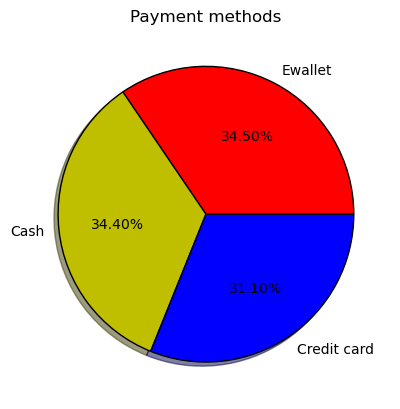

In [31]:
c=['r','y','b']
plt.pie(x,labels=['Ewallet','Cash','Credit card'],shadow=True,autopct='%1.2f%%',wedgeprops={'edgecolor':'black'},colors=c)
plt.title('Payment methods')
plt.show()

In [32]:
sales['Total'].mean()

322.966749

In [33]:
sales['Tax 5%'].sum().round(2)

15379.37

In [32]:
a=pd.DataFrame(sales.groupby('Branch')['Total'].aggregate(sum)).round(1)
a

,Total
Branch,
A,106200.4
B,106197.7
C,110568.7


In [15]:
b=pd.DataFrame(sales.groupby('Payment')['Total'].aggregate(sum))
b

,Total
Payment,
Cash,112206.570
Credit card,100767.072
Ewallet,109993.107


In [5]:
c=pd.DataFrame(sales.groupby('City')['Total'].aggregate(sum))
c

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


In [40]:
a.to_excel("B_to_T.xlsx")

In [41]:
b.to_excel("P_to_T.xlsx")

In [6]:
c.to_excel("C_to_T.xlsx")

In [ ]:
sales.to_excel("smsn.xlsx")